Kernel: rbf, C: 1, Gamma: scale, Degree: 3
Accuracy: 0.9333, F1: 0.9333, Precision: 0.9345, Recall: 0.9333

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.93      0.90        15
           2       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



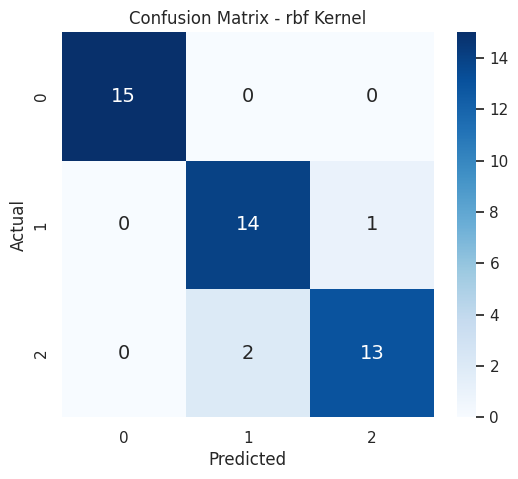

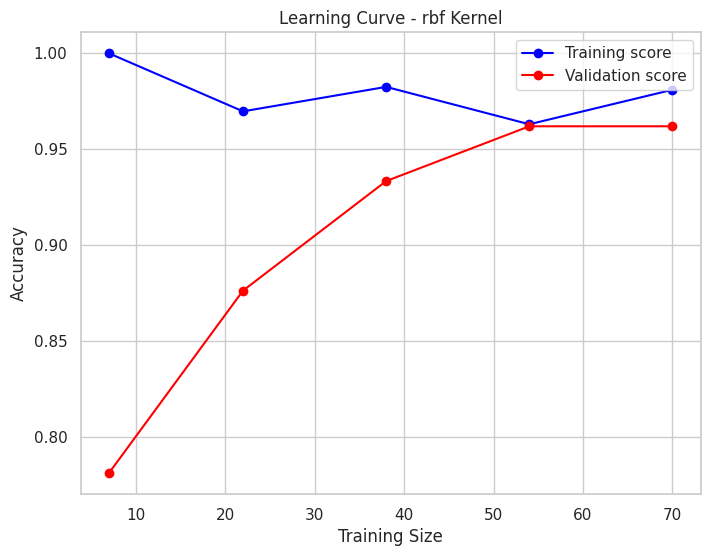

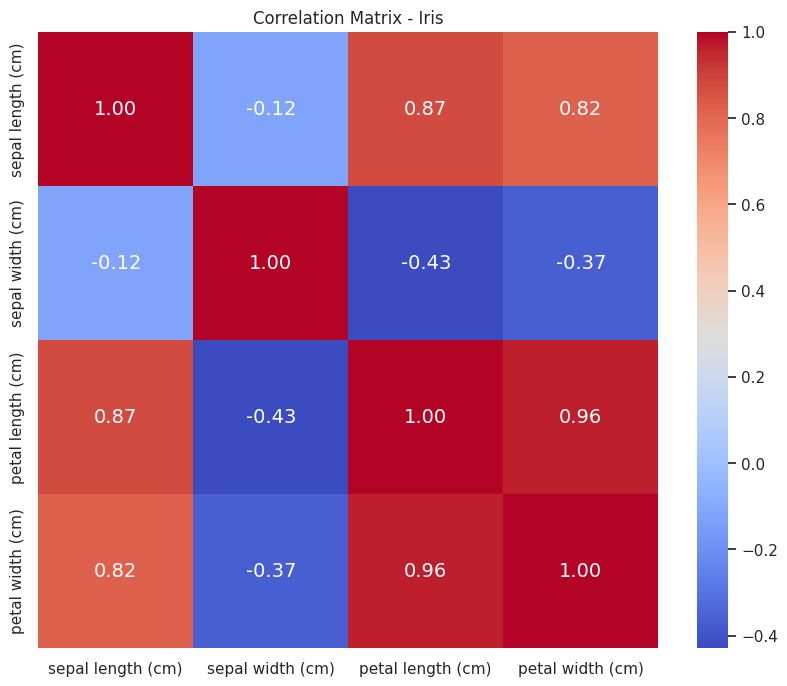

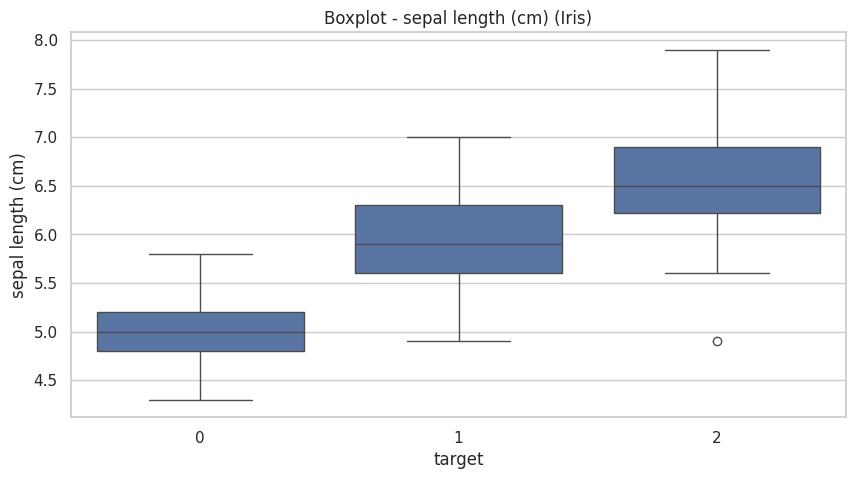

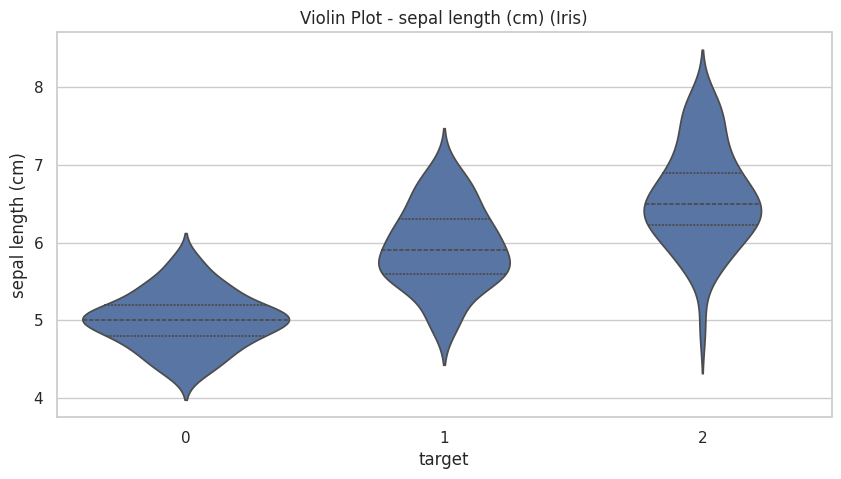

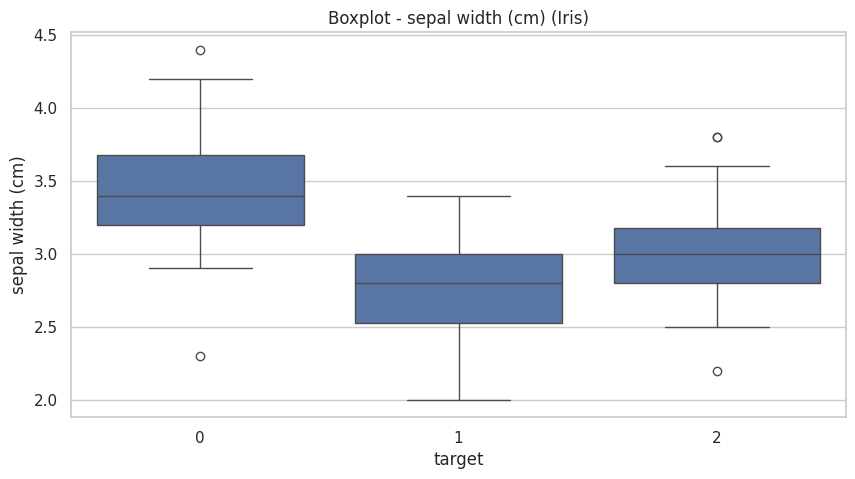

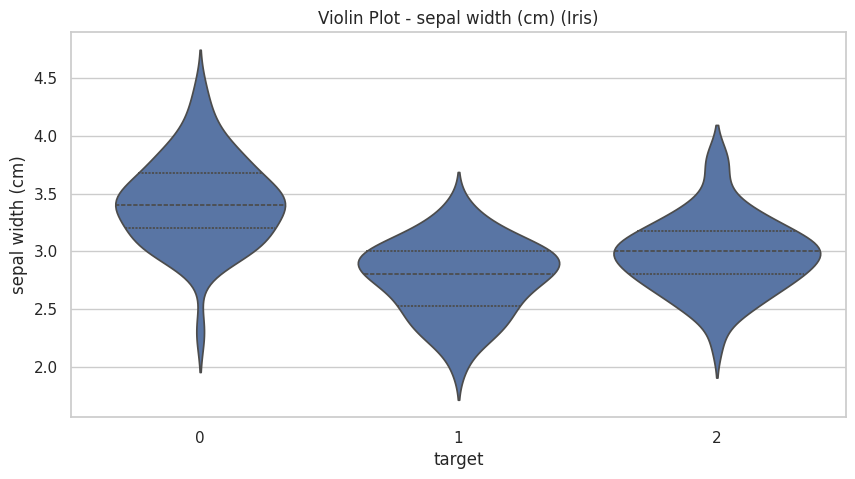

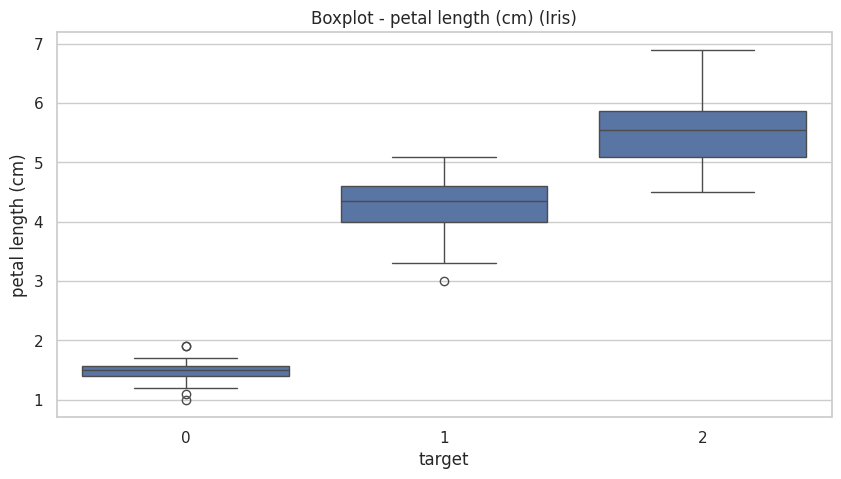

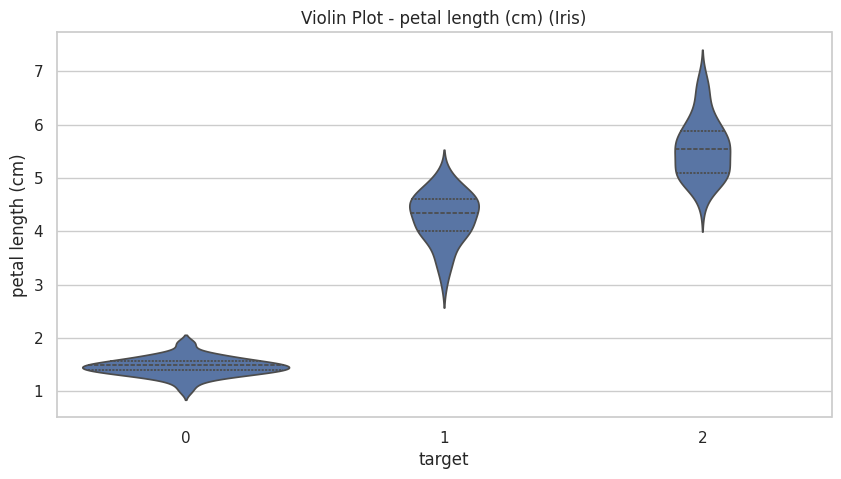

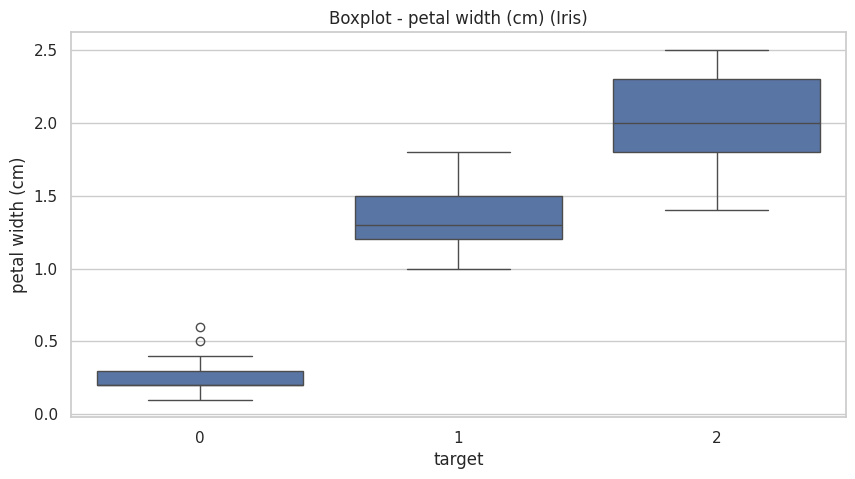

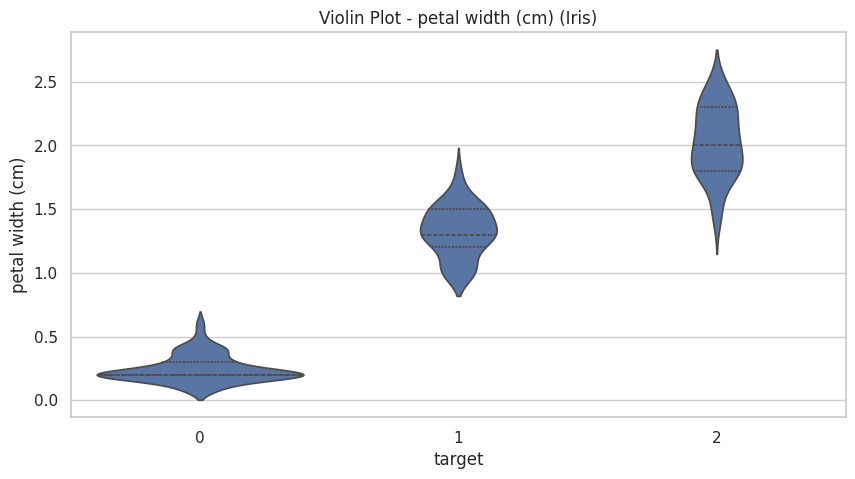

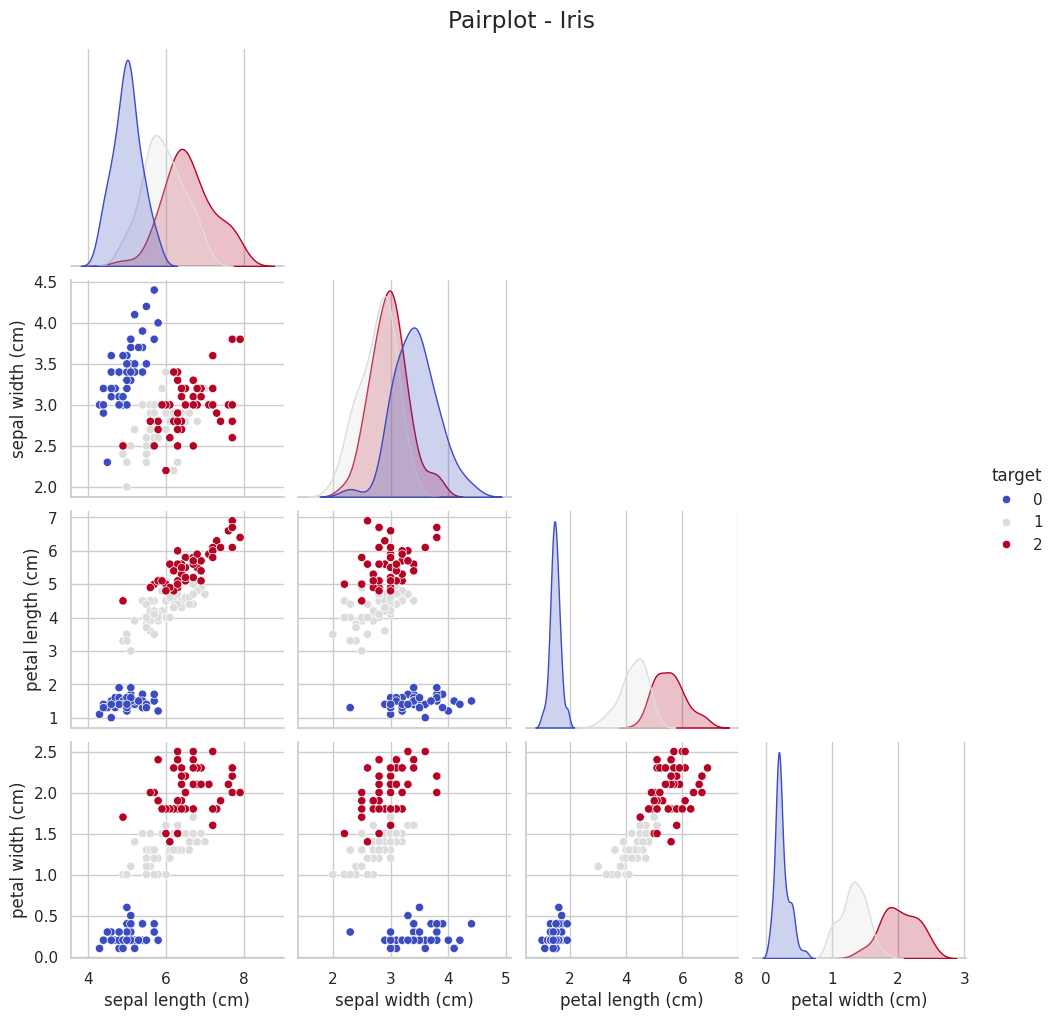

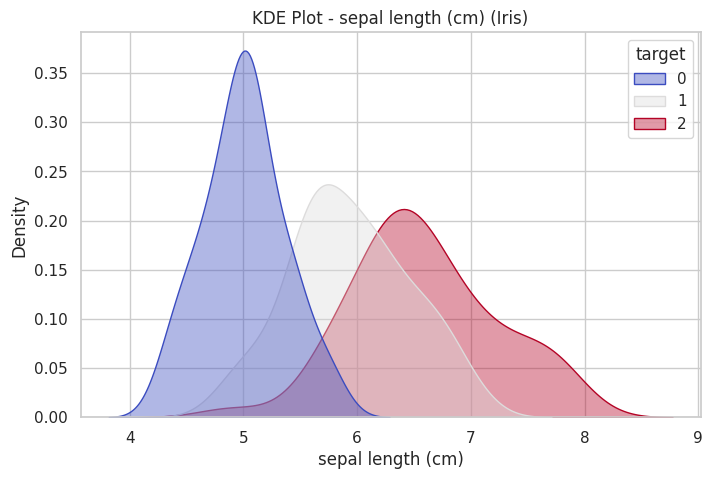

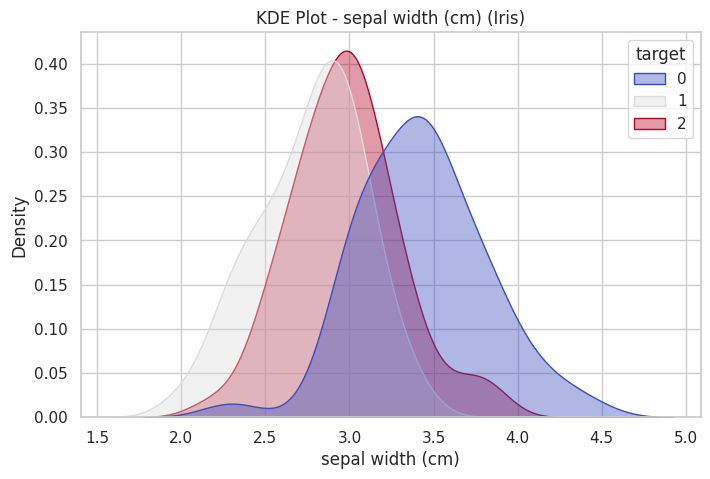

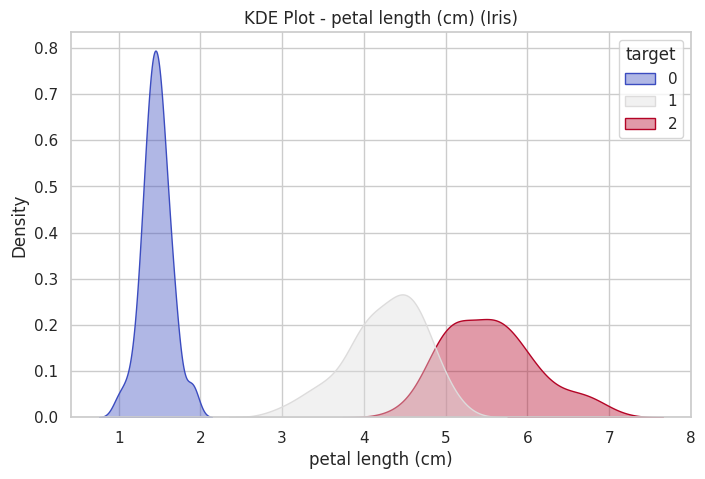

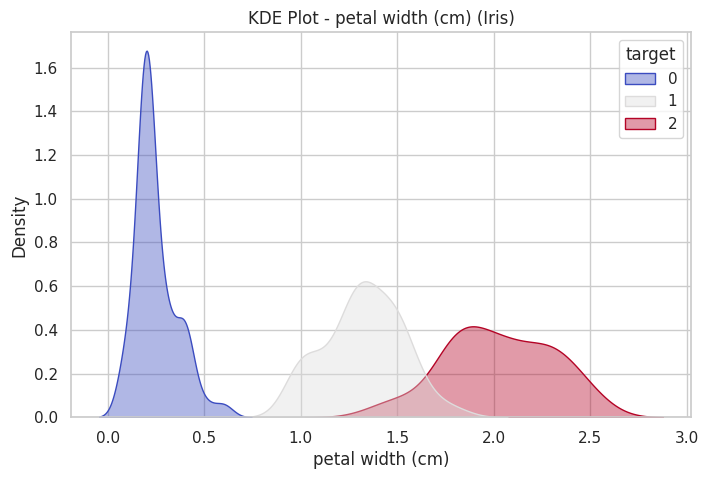

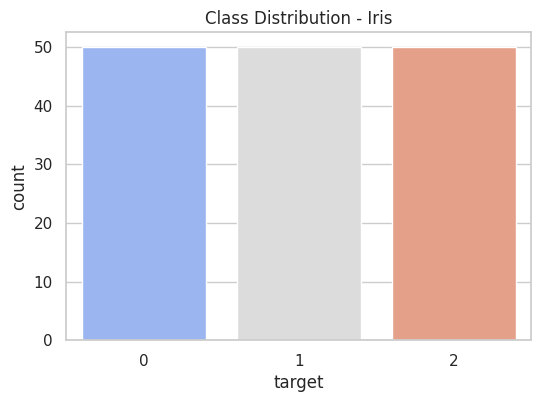

Kernel: rbf, C: 1, Gamma: scale, Degree: 3
Accuracy: 0.9168, F1: 0.9168, Precision: 0.9169, Recall: 0.9168

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.92      3000
           1       0.91      0.92      0.92      3000

    accuracy                           0.92      6000
   macro avg       0.92      0.92      0.92      6000
weighted avg       0.92      0.92      0.92      6000



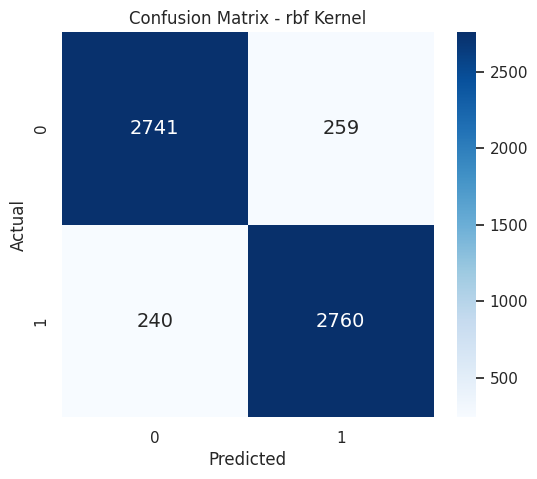

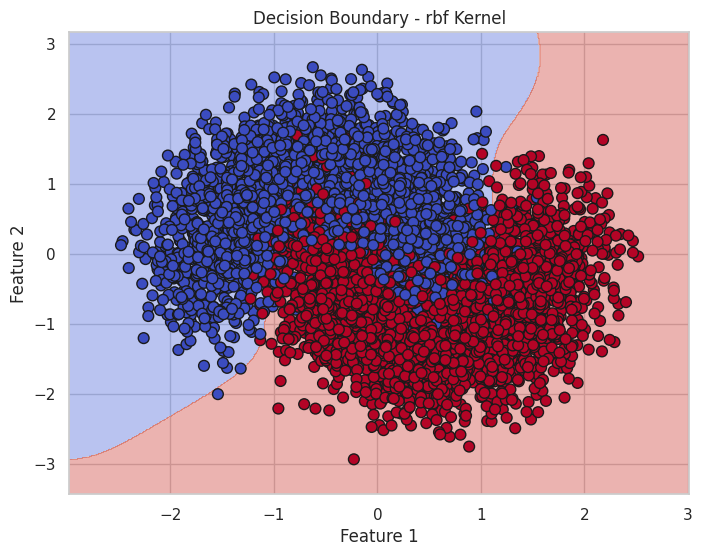

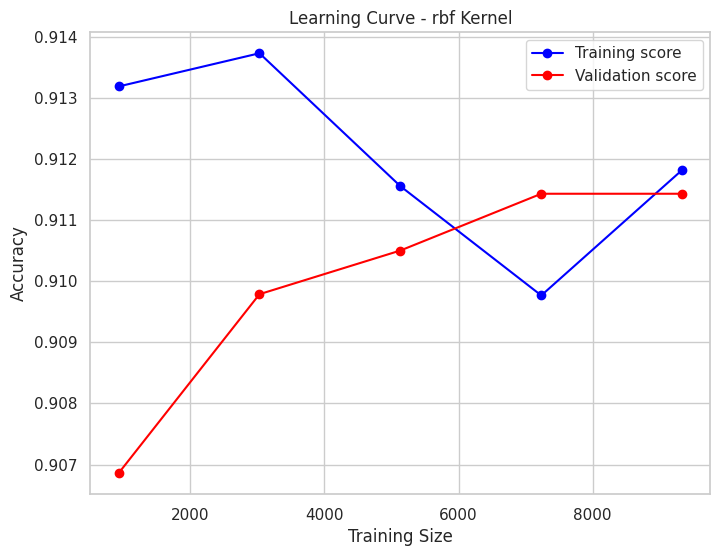

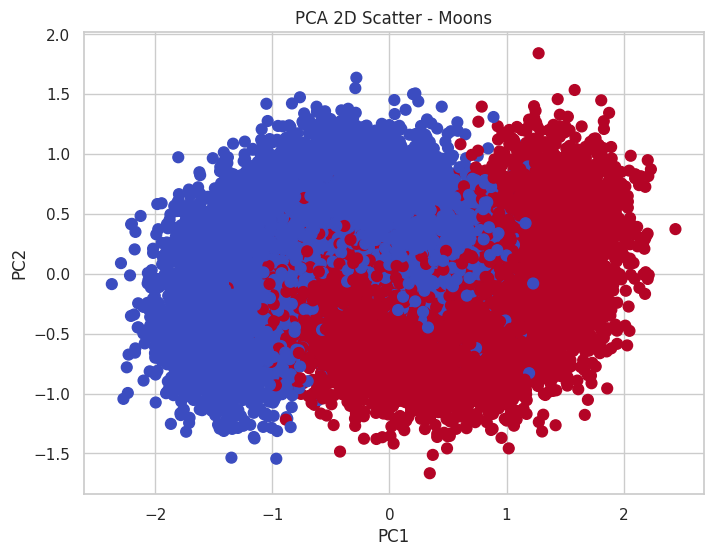

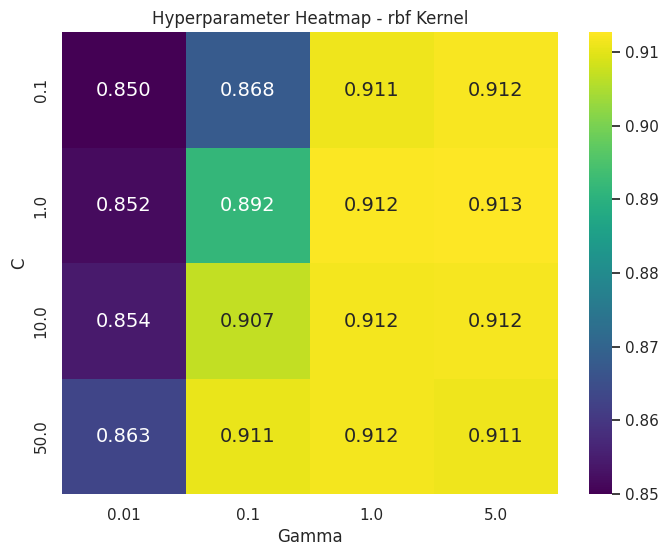

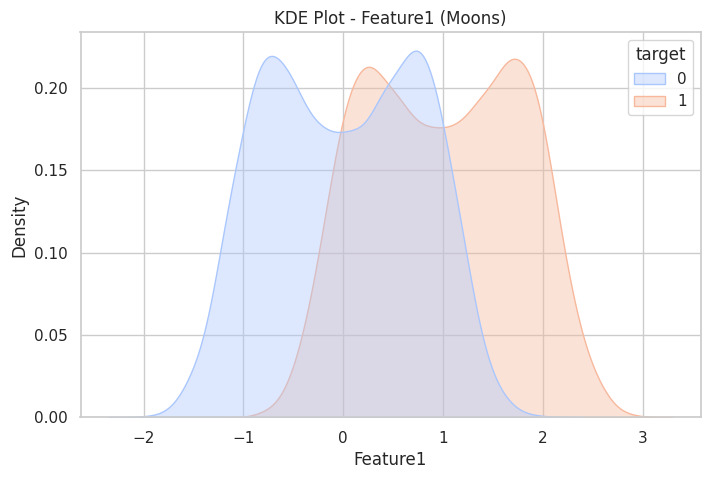

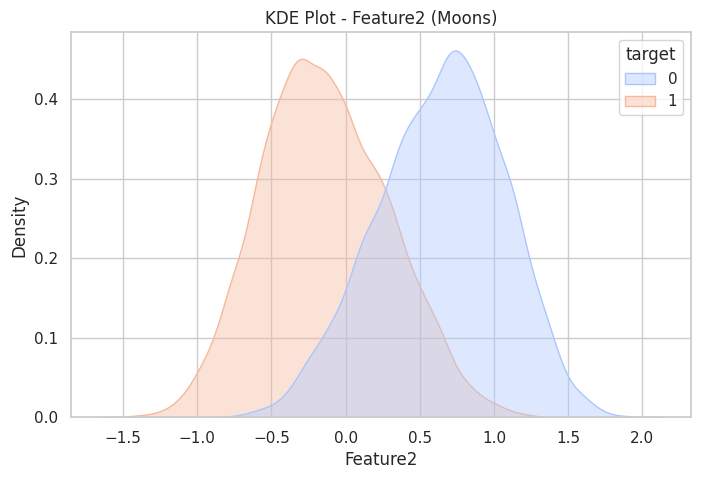

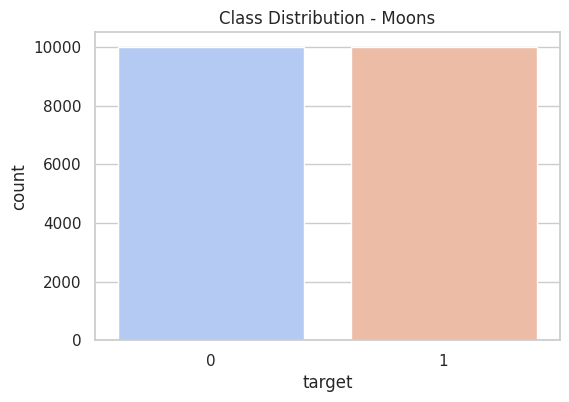

Kernel: rbf, C: 1, Gamma: scale, Degree: 3
Accuracy: 0.9318, F1: 0.9315, Precision: 0.9319, Recall: 0.9318

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94      2003
           1       0.93      0.96      0.94      2000
           2       0.94      0.88      0.91      1997

    accuracy                           0.93      6000
   macro avg       0.93      0.93      0.93      6000
weighted avg       0.93      0.93      0.93      6000



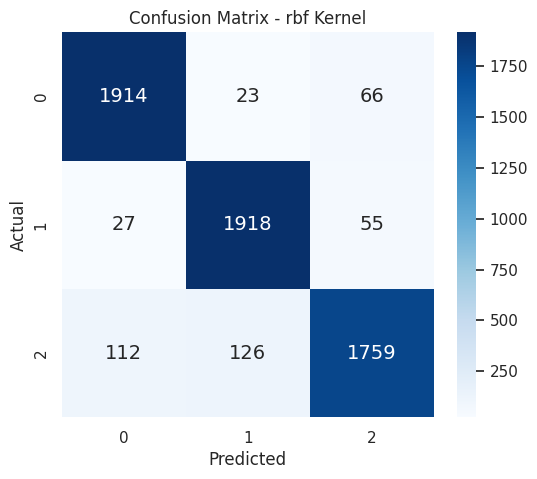

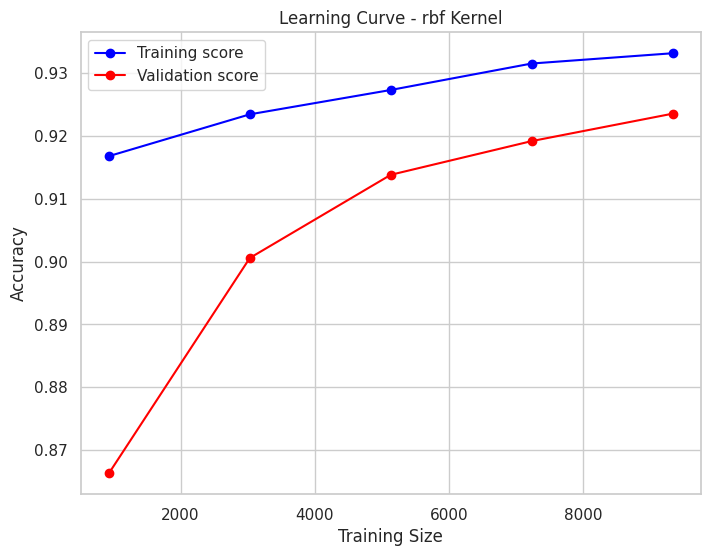

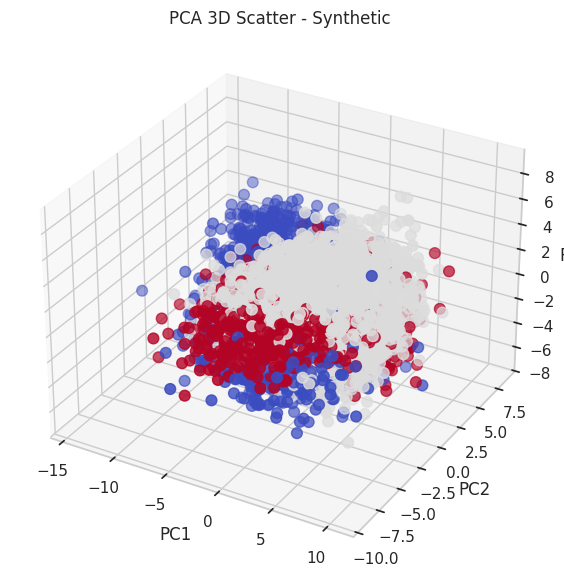

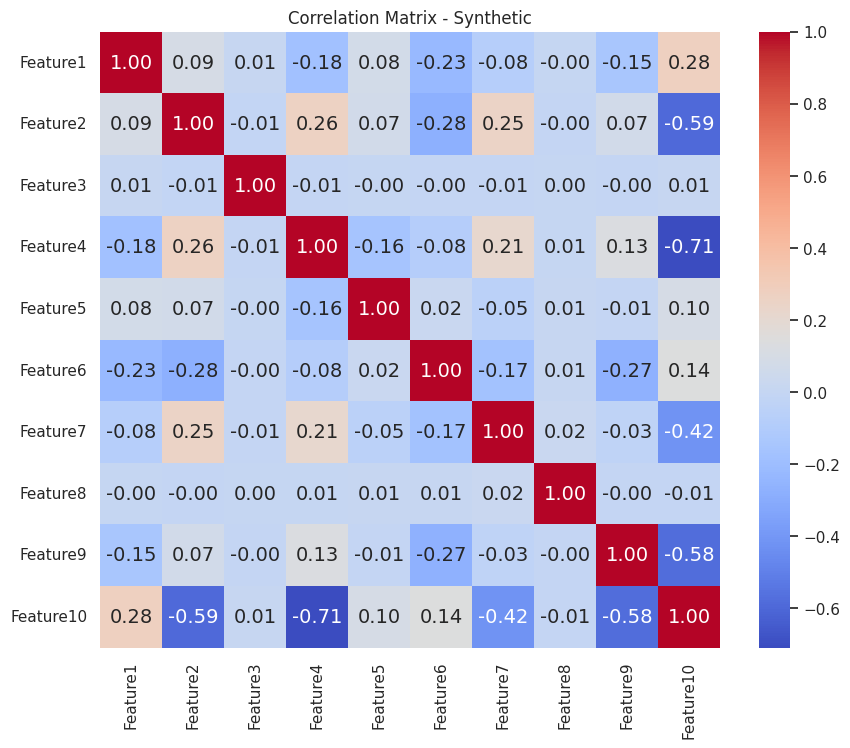

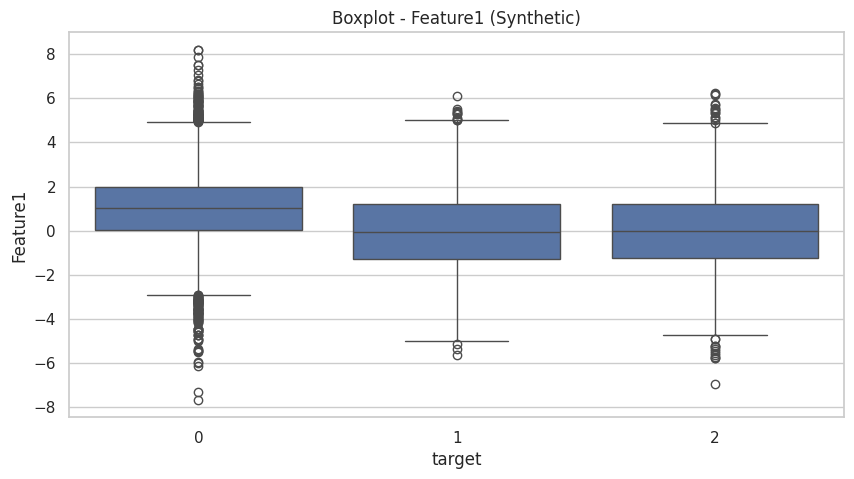

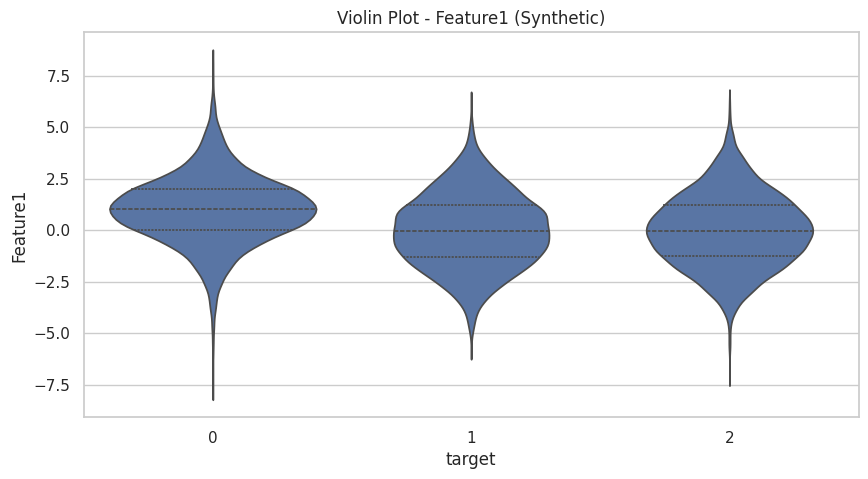

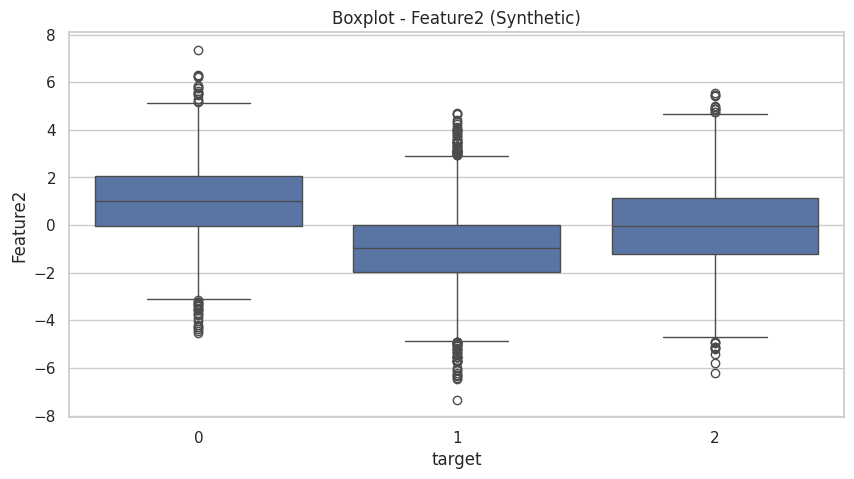

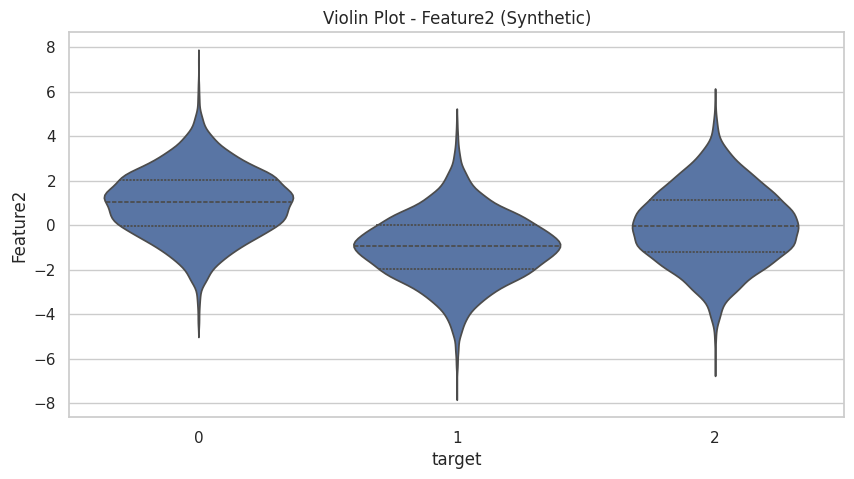

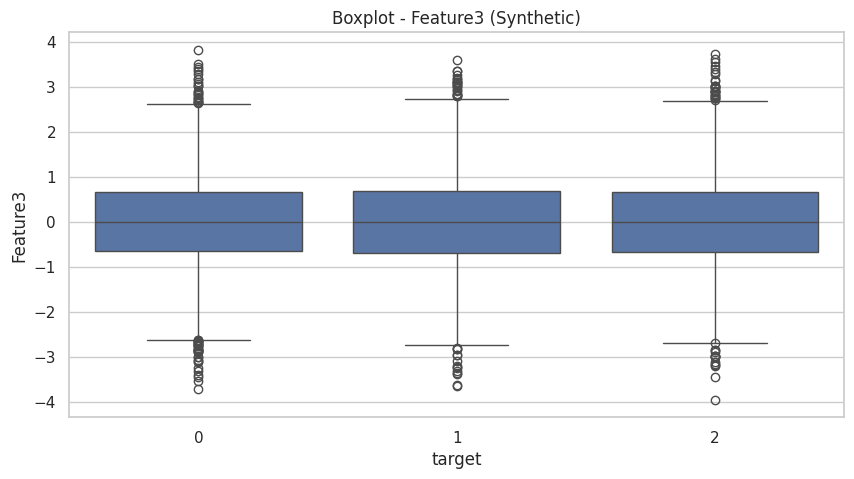

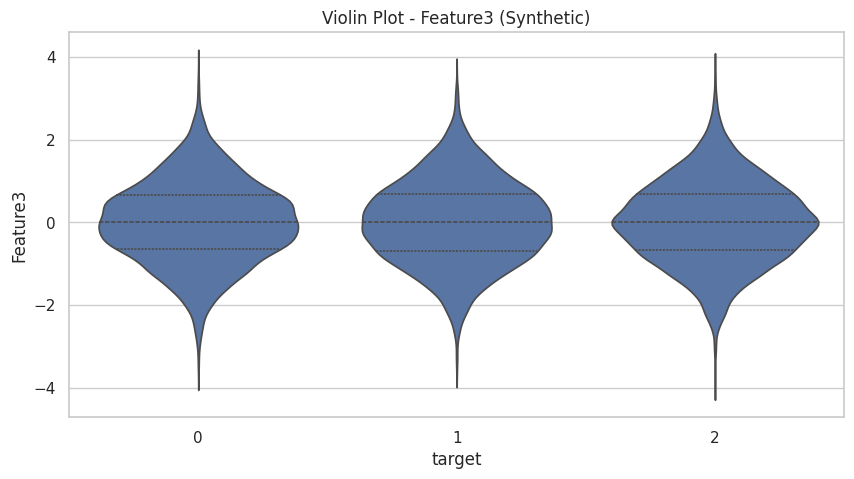

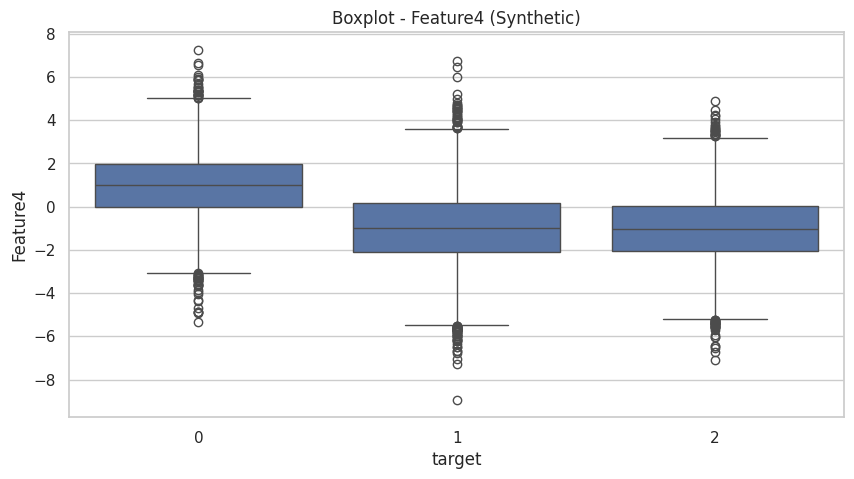

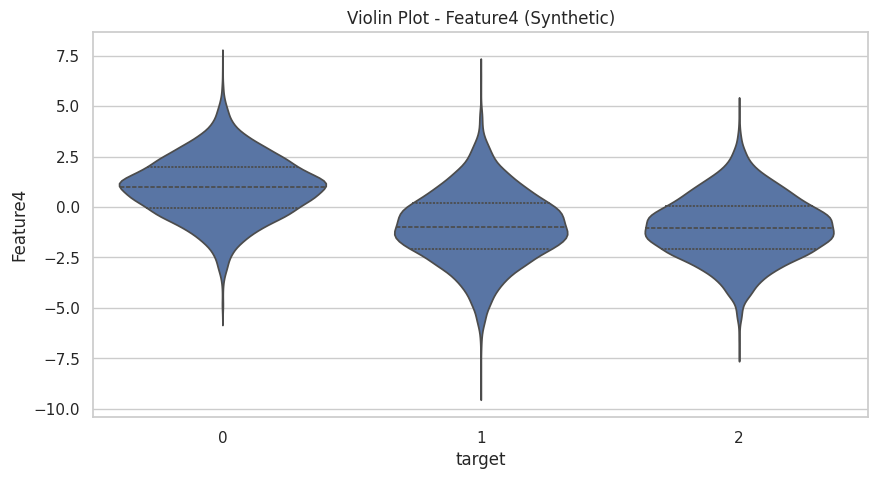

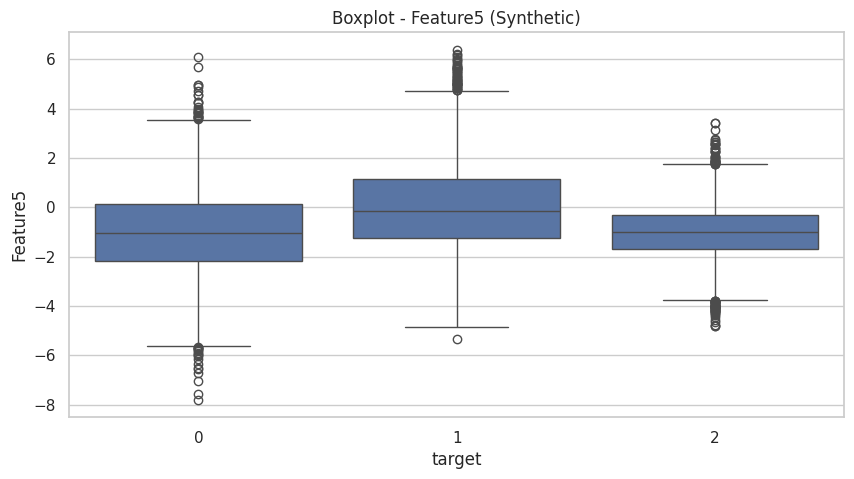

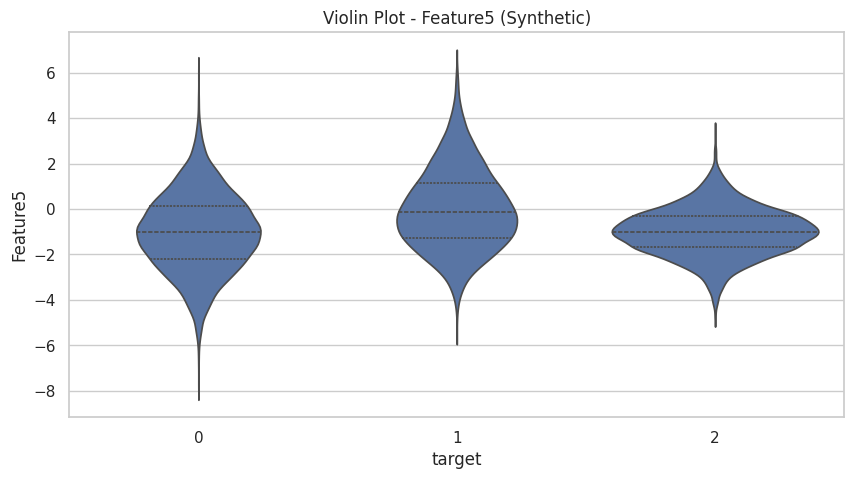

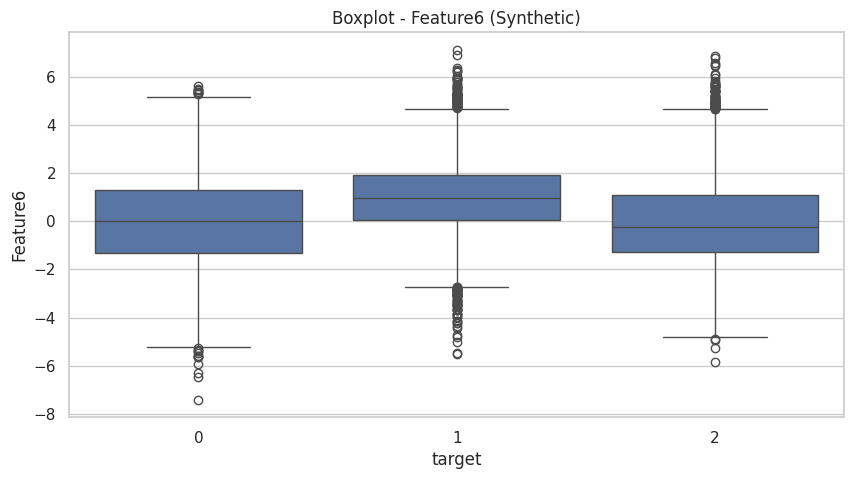

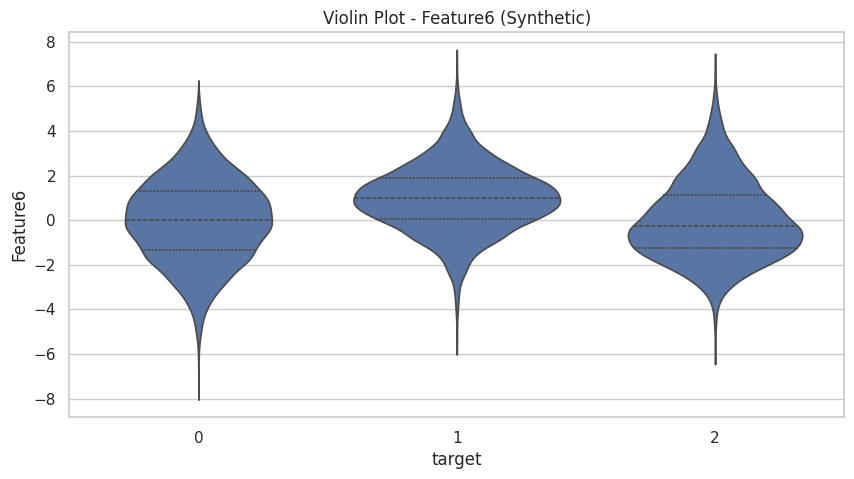

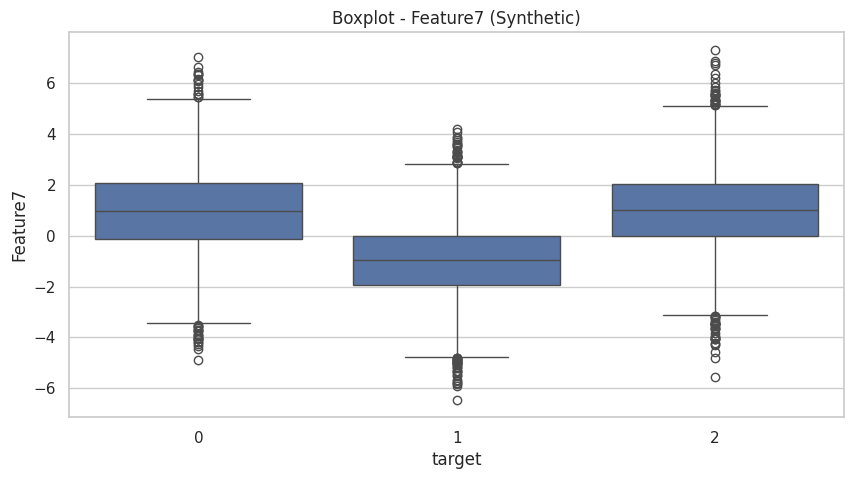

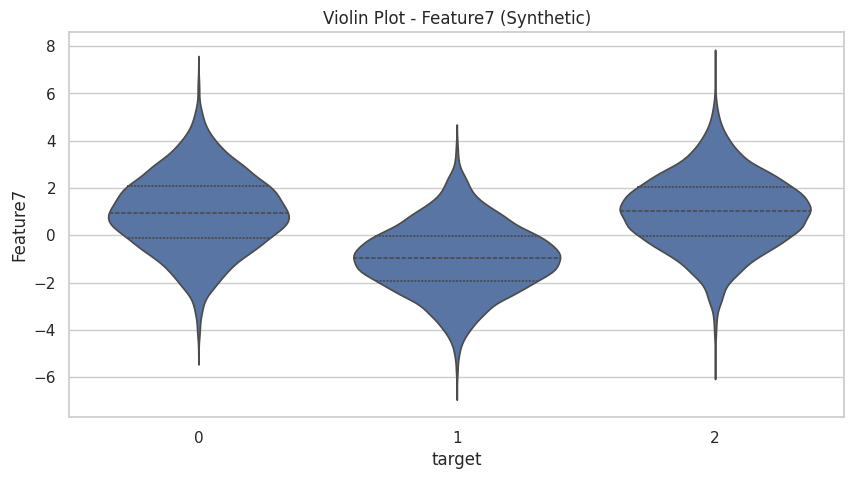

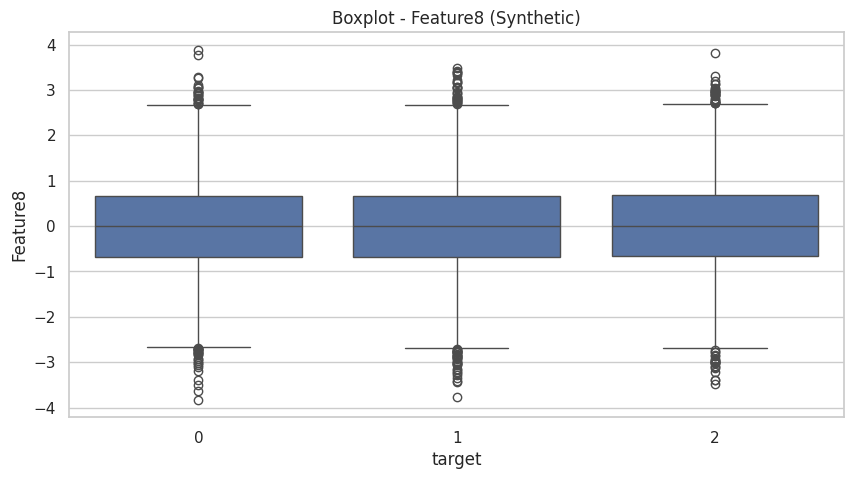

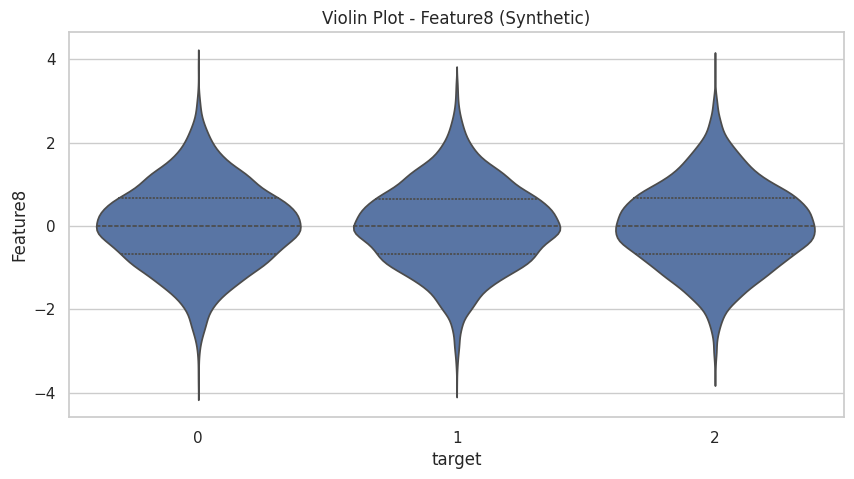

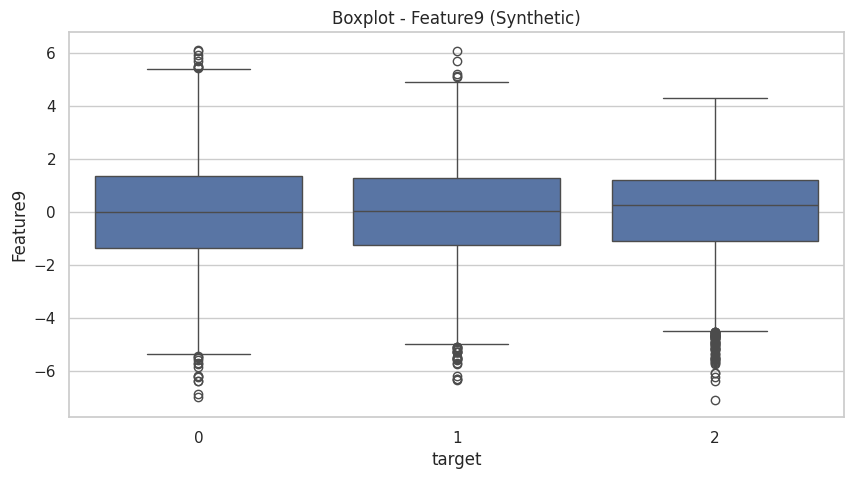

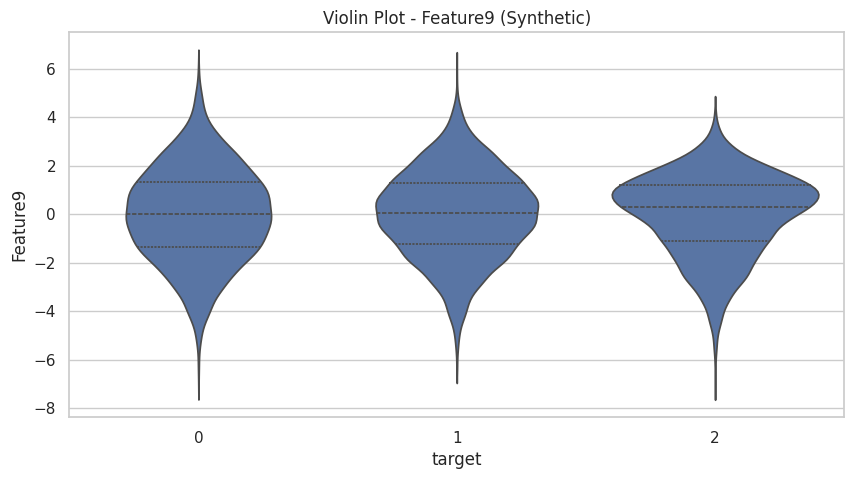

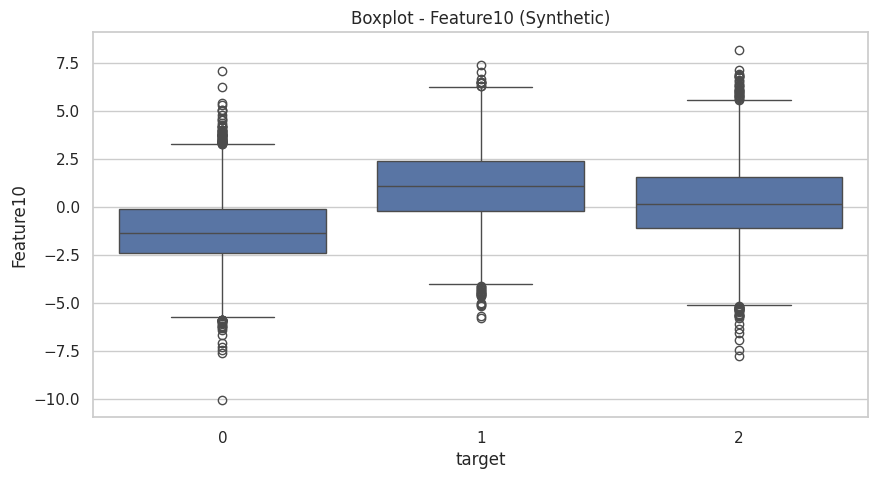

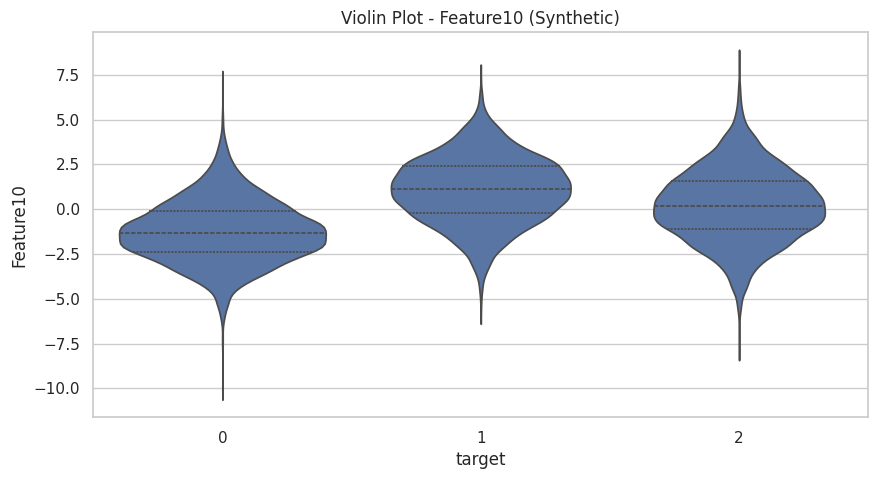

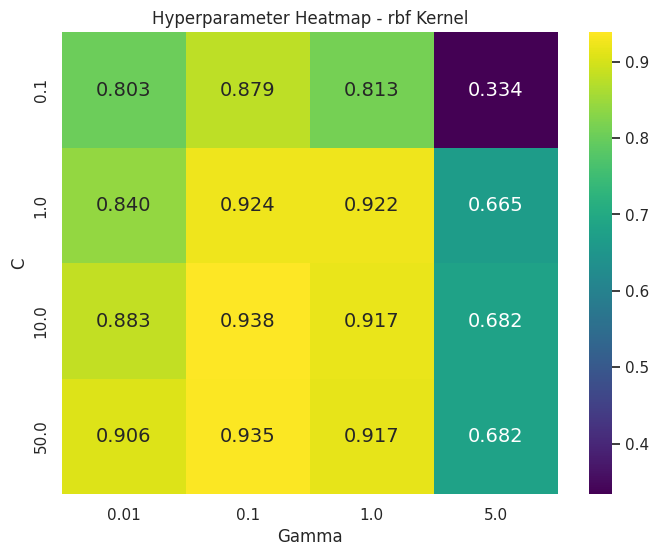

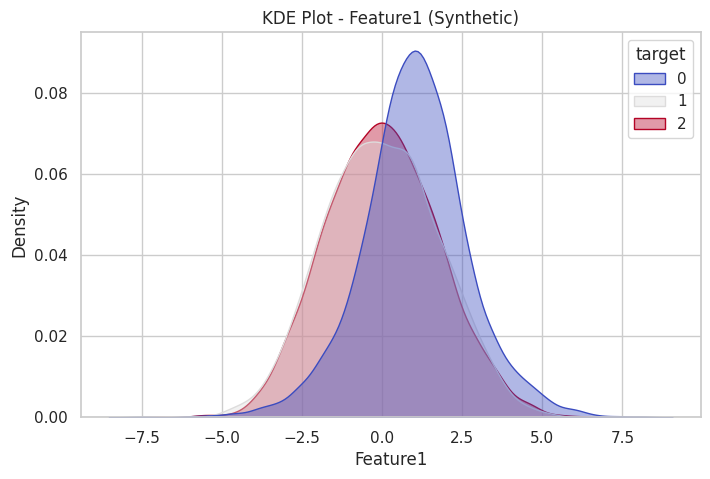

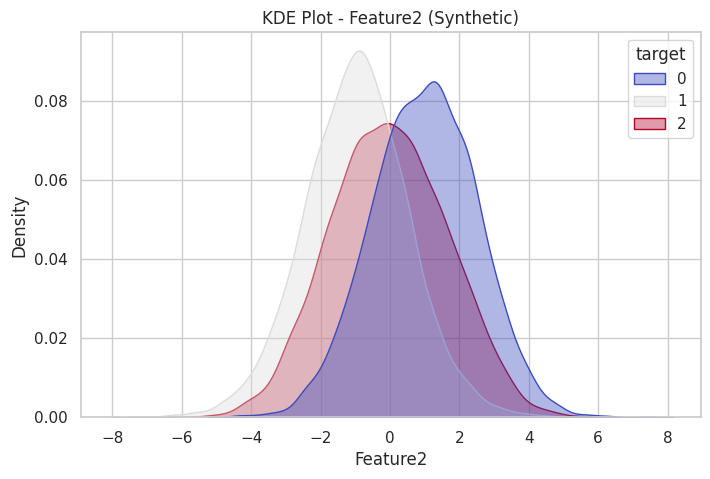

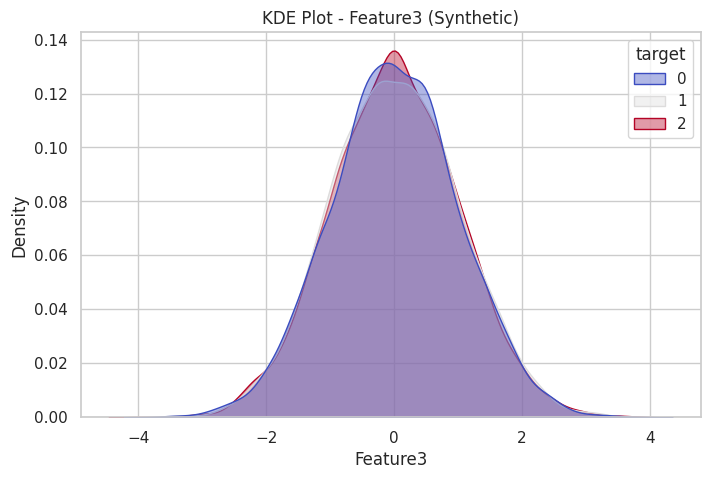

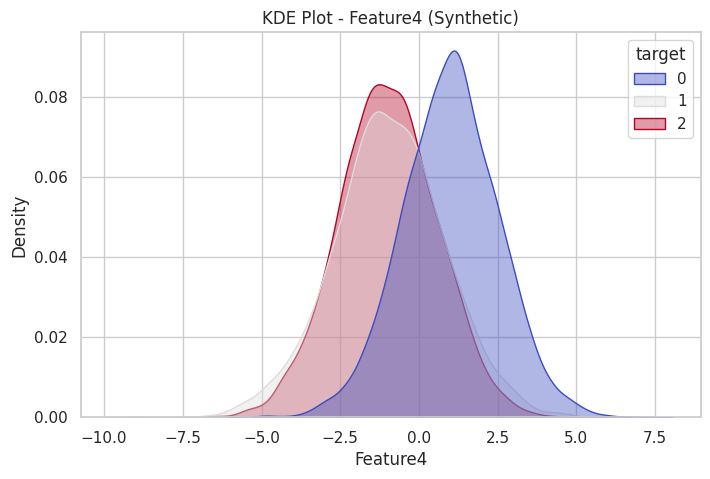

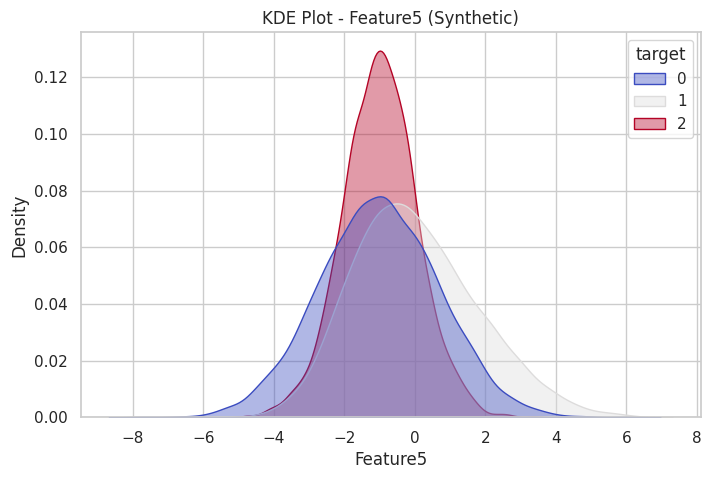

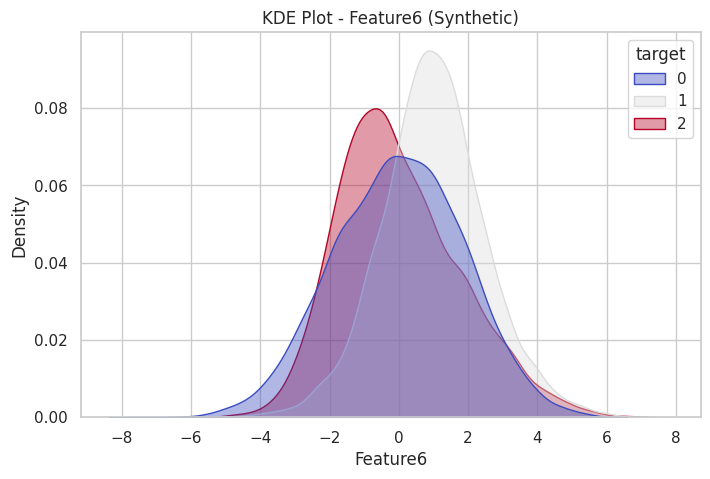

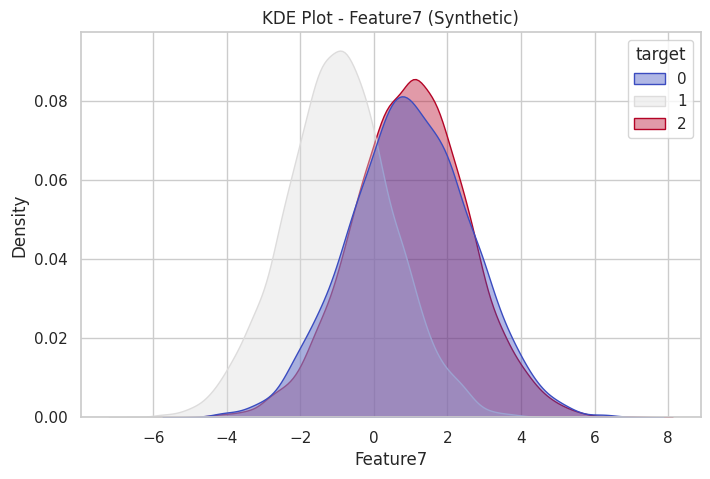

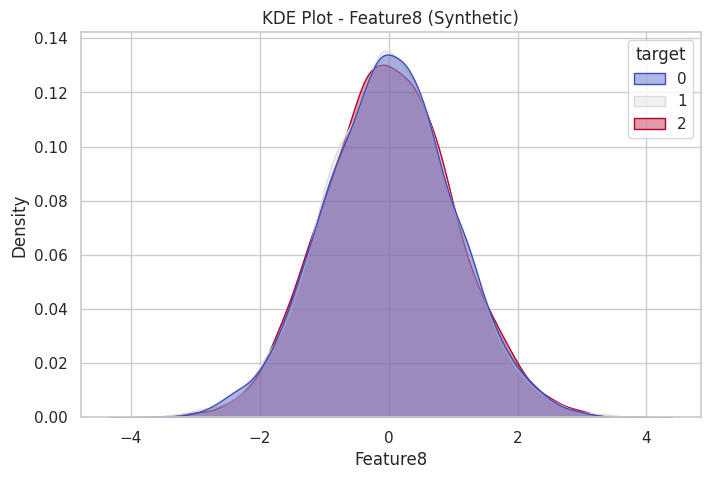

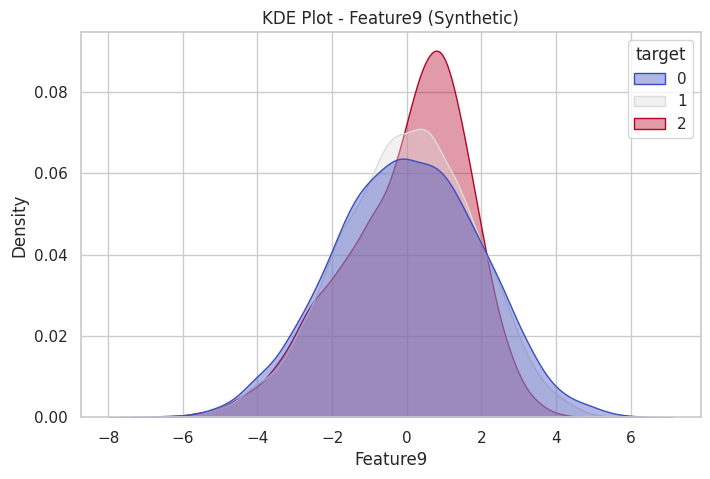

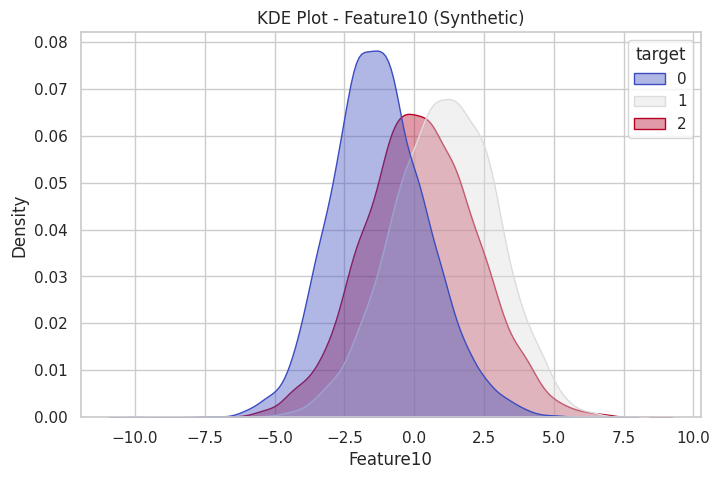

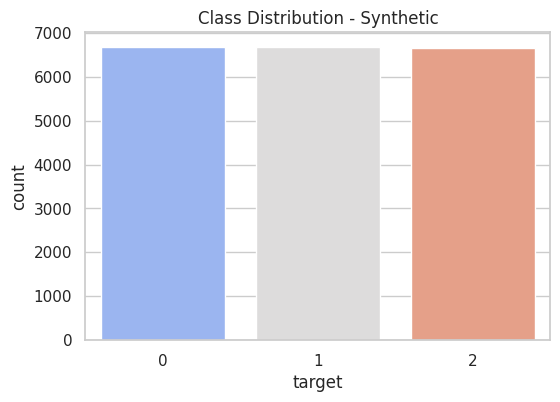

interactive(children=(FloatLogSlider(value=1.0, description='C:', max=2.0, min=-1.0), FloatLogSlider(value=0.1…

In [ ]:
# =============================================
# Advanced SVM Kernel Analysis
# =============================================

# Step 1: Import Libraries
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, make_moons, make_classification
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from IPython.display import display

sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 14, 'figure.figsize': (10,6)})

# =============================================
# Step 2: Generate Large Datasets
# =============================================
iris = load_iris()
X_iris, y_iris = iris.data, iris.target

X_moons, y_moons = make_moons(n_samples=20000, noise=0.3, random_state=42)
X_syn, y_syn = make_classification(n_samples=20000, n_features=10, n_informative=7,
                                   n_redundant=1, n_classes=3, random_state=42)

# =============================================
# Step 3: Preprocessing
# =============================================
def preprocess(X, y, test_size=0.3):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,
                                                        random_state=42, stratify=y)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test, y_train, y_test

X_train_iris, X_test_iris, y_train_iris, y_test_iris = preprocess(X_iris, y_iris)
X_train_moons, X_test_moons, y_train_moons, y_test_moons = preprocess(X_moons, y_moons)
X_train_syn, X_test_syn, y_train_syn, y_test_syn = preprocess(X_syn, y_syn)

# =============================================
# Step 4: SVM Training Function
# =============================================
def train_and_evaluate_svm(X_train, X_test, y_train, y_test, kernel='rbf', C=1, gamma='scale', degree=3):
    model = SVC(kernel=kernel, C=C, gamma=gamma, degree=degree, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    print(f"Kernel: {kernel}, C: {C}, Gamma: {gamma}, Degree: {degree}")
    print(f"Accuracy: {acc:.4f}, F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}\n")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {kernel} Kernel')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # Decision boundary for 2D datasets
    if X_train.shape[1] == 2:
        x_min, x_max = X_test[:,0].min()-0.5, X_test[:,0].max()+0.5
        y_min, y_max = X_test[:,1].min()-0.5, X_test[:,1].max()+0.5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        plt.figure(figsize=(8,6))
        plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
        plt.scatter(X_test[:,0], X_test[:,1], c=y_test, s=60, edgecolor='k', cmap='coolwarm')
        plt.title(f'Decision Boundary - {kernel} Kernel')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.show()

    # Learning Curve
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train,
                                                            cv=3, train_sizes=np.linspace(0.1,1,5))
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    plt.figure(figsize=(8,6))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, test_mean, 'o-', color='red', label='Validation score')
    plt.title(f'Learning Curve - {kernel} Kernel')
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

    return model

# =============================================
# Step 5: Correlation Heatmap
# =============================================
def plot_correlation_heatmap(X, dataset_name='Dataset', feature_names=None):
    df = pd.DataFrame(X, columns=feature_names)
    plt.figure(figsize=(10,8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Matrix - {dataset_name}')
    plt.show()

# =============================================
# Step 6: Boxplot & Violin Plot
# =============================================
def plot_box_violin(X, y, dataset_name='Dataset', feature_names=None):
    df = pd.DataFrame(X, columns=feature_names)
    df['target'] = y
    for feature in feature_names:
        plt.figure(figsize=(10,5))
        sns.boxplot(x='target', y=feature, data=df)
        plt.title(f'Boxplot - {feature} ({dataset_name})')
        plt.show()
        plt.figure(figsize=(10,5))
        sns.violinplot(x='target', y=feature, data=df, inner='quartile')
        plt.title(f'Violin Plot - {feature} ({dataset_name})')
        plt.show()

# =============================================
# Step 7: Pairplot for feature relationships
# =============================================
def plot_pairplot(X, y, dataset_name='Dataset', feature_names=None):
    df = pd.DataFrame(X, columns=feature_names)
    df['target'] = y
    sns.pairplot(df, hue='target', corner=True, palette='coolwarm')
    plt.suptitle(f'Pairplot - {dataset_name}', y=1.02)
    plt.show()

# =============================================
# Step 8: PCA 3D Visualization
# =============================================
def plot_pca_3d(X, y, dataset_name='Dataset'):
    n_features = X.shape[1]
    n_components = 3 if n_features >= 3 else n_features  # avoid error
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    if n_components == 3:
        fig = plt.figure(figsize=(10,7))
        ax = fig.add_subplot(111, projection='3d')
        scatter = ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=y, cmap='coolwarm', s=60)
        ax.set_title(f'PCA 3D Scatter - {dataset_name}')
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')
        ax.set_zlabel('PC3')
        plt.show()
    else:
        plt.figure(figsize=(8,6))
        plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', s=60)
        plt.title(f'PCA 2D Scatter - {dataset_name}')
        plt.xlabel('PC1')
        plt.ylabel('PC2')
        plt.show()


# =============================================
# Step 9: Hyperparameter Grid Search Heatmap
# =============================================
def hyperparameter_heatmap(X_train, y_train, kernel='rbf'):
    param_grid = {'C':[0.1,1,10,50], 'gamma':[0.01,0.1,1,5]}
    grid = GridSearchCV(SVC(kernel=kernel), param_grid, cv=3, scoring='accuracy')
    grid.fit(X_train, y_train)
    heatmap_data = pd.DataFrame(grid.cv_results_['mean_test_score'].reshape(len(param_grid['C']),
                                                                          len(param_grid['gamma'])),
                                index=param_grid['C'], columns=param_grid['gamma'])
    plt.figure(figsize=(8,6))
    sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap='viridis')
    plt.title(f'Hyperparameter Heatmap - {kernel} Kernel')
    plt.xlabel('Gamma')
    plt.ylabel('C')
    plt.show()

# =============================================
# Step 10: Feature Distribution KDE & Class Distribution
# =============================================
def plot_kde_and_class_dist(X, y, dataset_name='Dataset', feature_names=None):
    df = pd.DataFrame(X, columns=feature_names)
    df['target'] = y
    # KDE plots
    for feature in feature_names:
        plt.figure(figsize=(8,5))
        sns.kdeplot(data=df, x=feature, hue='target', fill=True, alpha=0.4, palette='coolwarm')
        plt.title(f'KDE Plot - {feature} ({dataset_name})')
        plt.show()
    # Class distribution
    plt.figure(figsize=(6,4))
    sns.countplot(x='target', data=df, palette='coolwarm')
    plt.title(f'Class Distribution - {dataset_name}')
    plt.show()

# =============================================
# Step 11: Interactive SVM Hyperparameter Widget
# =============================================
def interactive_svm(X_train, X_test, y_train, y_test, kernel='rbf'):
    C_slider = widgets.FloatLogSlider(value=1, base=10, min=-1, max=2, step=0.1, description='C:')
    gamma_slider = widgets.FloatLogSlider(value=0.1, base=10, min=-2, max=1, step=0.1, description='Gamma:')
    degree_slider = widgets.IntSlider(value=3, min=2, max=5, step=1, description='Degree:')

    def update(C, gamma, degree):
        plt.close()
        train_and_evaluate_svm(X_train, X_test, y_train, y_test, kernel=kernel, C=C, gamma=gamma, degree=degree)

    if kernel == 'poly':
        widgets.interact(update, C=C_slider, gamma=gamma_slider, degree=degree_slider)
    else:
        widgets.interact(update, C=C_slider, gamma=gamma_slider, degree=widgets.fixed(3))

# =============================================
# Step 12: Run Analysis on All Datasets
# =============================================
feature_names_iris = iris.feature_names
feature_names_syn = [f'Feature{i}' for i in range(1,11)]

# Iris
iris_model = train_and_evaluate_svm(X_train_iris, X_test_iris, y_train_iris, y_test_iris)
plot_correlation_heatmap(X_iris, 'Iris', feature_names_iris)
plot_box_violin(X_iris, y_iris, 'Iris', feature_names_iris)
plot_pairplot(X_iris, y_iris, 'Iris', feature_names_iris)
plot_kde_and_class_dist(X_iris, y_iris, 'Iris', feature_names_iris)

# Moons
moons_model = train_and_evaluate_svm(X_train_moons, X_test_moons, y_train_moons, y_test_moons)
plot_pca_3d(X_moons, y_moons, 'Moons')
hyperparameter_heatmap(X_train_moons, y_train_moons)
plot_kde_and_class_dist(X_moons, y_moons, 'Moons', ['Feature1','Feature2'])

# Synthetic
syn_model = train_and_evaluate_svm(X_train_syn, X_test_syn, y_train_syn, y_test_syn)
plot_pca_3d(X_syn, y_syn, 'Synthetic')
plot_correlation_heatmap(X_syn, 'Synthetic', feature_names_syn)
plot_box_violin(X_syn, y_syn, 'Synthetic', feature_names_syn)
hyperparameter_heatmap(X_train_syn, y_train_syn)
plot_kde_and_class_dist(X_syn, y_syn, 'Synthetic', feature_names_syn)

# Interactive SVM for Moons (can toggle C & Gamma)
interactive_svm(X_train_moons, X_test_moons, y_train_moons, y_test_moons)
